## OBS: A análise foi feita em uma parte dos dados pois a API restringe o limite de 100 linhas por requisição, então por fins de práticidade foram limitados a 10 requisições com limite de 100.

In [ ]:
import requests
import time
import hashlib
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

Definindo a apikey usando Hash MD5: ts+privateKey+publicKey
   (https://developer.marvel.com/documentation/authorization)

In [ ]:
PUBLIC_KEY = "0b08b7e93738e4973b80ae94c2986e7d"
PRIVATE_KEY = "292deed8848488aa3574b5eae82f97b0f22da73c"

ts = int(time.time())

hash_md5 = hashlib.md5(f"{ts}{PRIVATE_KEY}{PUBLIC_KEY}".encode()).hexdigest()

url = "http://gateway.marvel.com/v1/public/creators"

parametros = {
    "ts": ts,
    "apikey": PUBLIC_KEY,
    "hash": hash_md5,
    "limit": 100
    }

response = requests.get(url, params=parametros)

print(response)

<Response [200]>
{'code': 200, 'status': 'Ok', 'copyright': '© 2025 MARVEL', 'attributionText': 'Data provided by Marvel. © 2025 MARVEL', 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>', 'etag': 'ae656024b5650dddac3381630f80ba60417d3537', 'data': {'offset': 0, 'limit': 100, 'total': 6112, 'count': 100, 'results': [{'id': 13970, 'firstName': '#O', 'middleName': '', 'lastName': '', 'suffix': '', 'fullName': '#O', 'modified': '2019-12-11T17:10:07-0500', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available', 'extension': 'jpg'}, 'resourceURI': 'http://gateway.marvel.com/v1/public/creators/13970', 'comics': {'available': 4, 'collectionURI': 'http://gateway.marvel.com/v1/public/creators/13970/comics', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/8546', 'name': 'Earth X (1999)'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/10492', 'name': 'Paradise X (2002)'}, {'resourceURI':

# Devido à limitação das requests foi implementado 'offset' que coleta os dados da API por turnos.

In [ ]:
features = [
        "id",
        "fullName",
        "modified",
        "comics.available",
        "comics.returned",
        "series.available",
        "series.returned",
        "stories.available",
        "stories.returned",
        "events.available",
        "events.returned"
    ]

dataset= []

for rounds in range(1, 10):
  parametros["offset"] = rounds
  response = requests.get(url, params=parametros)
  dataset.extend(response.json()["data"]["results"])

df = pd.json_normalize(dataset)[features]
df = pd.DataFrame(df)

In [ ]:
df.columns

Index(['id', 'fullName', 'modified', 'comics.available', 'comics.returned',
       'series.available', 'series.returned', 'stories.available',
       'stories.returned', 'events.available', 'events.returned'],
      dtype='object')

In [ ]:
df.head(4)

,id,fullName,modified,comics.available,comics.returned,series.available,series.returned,stories.available,stories.returned,events.available,events.returned
0,13971,#X,2019-12-11T17:21:29-0500,4,4,4,4,4,4,0,0
1,6606,A.R.K.,2007-01-02T00:00:00-0500,0,0,0,0,0,0,0,0
2,1168,All Thumbs Creative,2018-07-24T11:50:20-0400,13,13,13,13,21,20,0,0
3,7470,ALSJOERDSMA,2007-01-02T00:00:00-0500,0,0,0,0,0,0,0,0


# Criando a feature 'participations' que é a soma de: comics, series, stories, events

In [ ]:
df["participations"] = (
    df["comics.available"] + df["series.available"] + df["stories.available"] + df["events.available"]
)

In [ ]:
df["participations"].head(5)

,participations
0,12
1,0
2,47
3,0
4,6


# Gráfico de creatores com mais participaçôes


<ipython-input-234-fd4d56d53d8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_criadores.values, y=top_criadores.index, palette="magma")


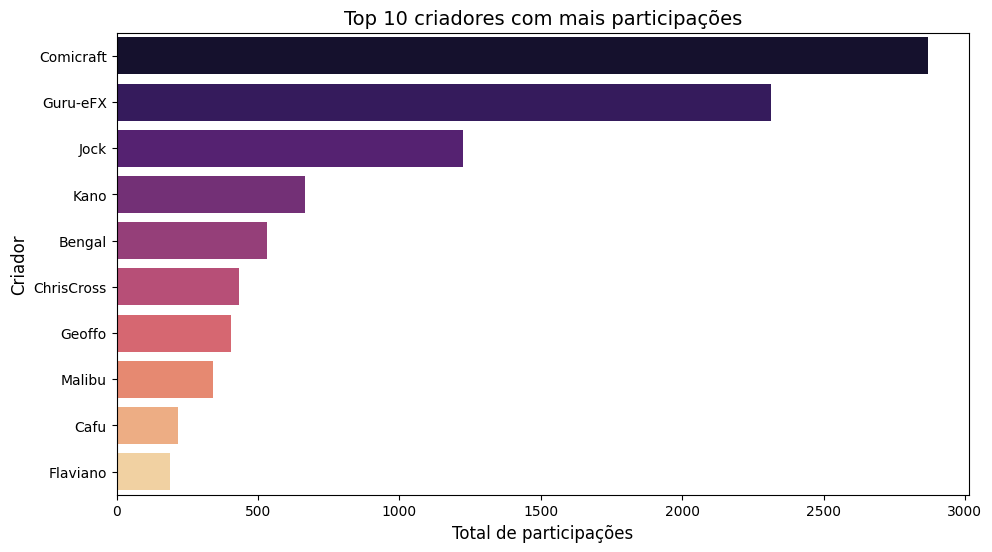

In [ ]:
top_criadores = df.groupby("fullName")["participations"].sum().nlargest(10)

plt.figure(figsize=(11, 6))
sns.barplot(x=top_criadores.values, y=top_criadores.index, palette="magma")

plt.title("Top 10 criadores com mais participações", fontsize=14)
plt.xlabel("Total de participações", fontsize=12)
plt.ylabel("Criador", fontsize=12)
plt.show()

# Top 10 criadores com mais participações:

1.   Comicraft
2.   Guru-dFX
3.   Jock
4.   Kano
5.   Bengal
6.   ChrisCross
7.   Geoffo
8.   Malibu
9.   Cafu
10.  Flaviano

# Endpoint: COMICS

In [ ]:
PUBLIC_KEY="e767bc67663296ecb30c27d5bf7bc97e"
PRIVATE_KEY="5a17622262a47b8d355175e5c6ca63a03dacda50"

ts = int(time.time())

hash_md5 = hashlib.md5(f"{ts}{PRIVATE_KEY}{PUBLIC_KEY}".encode()).hexdigest()

url = "http://gateway.marvel.com/v1/public/comics"

parametros = {
    "ts": ts,
    "apikey": PUBLIC_KEY,
    "hash": hash_md5,
    "limit": 100
    }
response = requests.get(url, params=parametros)

print(response)

<Response [200]>
{'code': 200, 'status': 'Ok', 'copyright': '© 2025 MARVEL', 'attributionText': 'Data provided by Marvel. © 2025 MARVEL', 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2025 MARVEL</a>', 'etag': 'a92bf62ab729934fe1772254d7da5c4fd08a456a', 'data': {'offset': 0, 'limit': 100, 'total': 63758, 'count': 100, 'results': [{'id': 82967, 'digitalId': 0, 'title': 'Marvel Previews (2017)', 'issueNumber': 0, 'variantDescription': '', 'description': '', 'modified': '2019-11-07T08:46:15-0500', 'isbn': '', 'upc': '75960608839302811', 'diamondCode': '', 'ean': '', 'issn': '', 'format': '', 'pageCount': 112, 'textObjects': [], 'resourceURI': 'http://gateway.marvel.com/v1/public/comics/82967', 'urls': [{'type': 'detail', 'url': 'http://marvel.com/comics/issue/82967/marvel_previews_2017?utm_campaign=apiRef&utm_source=e767bc67663296ecb30c27d5bf7bc97e'}], 'series': {'resourceURI': 'http://gateway.marvel.com/v1/public/series/23665', 'name': 'Marvel Previews (2017 

# Devido à limitação das requests foi implementado 'offset' que coleta os dados da API por turnos.

In [ ]:
dataset= []
for rounds in range(1, 10):
  parametros["offset"] = rounds
  response = requests.get(url, params=parametros)
  dataset.extend(response.json()["data"]["results"])

df = pd.json_normalize(dataset)
df = pd.DataFrame(df)

response = requests.get(url, params=parametros)

In [ ]:
df.columns.values

array(['id', 'digitalId', 'title', 'issueNumber', 'variantDescription',
       'description', 'modified', 'isbn', 'upc', 'diamondCode', 'ean',
       'issn', 'format', 'pageCount', 'textObjects', 'resourceURI',
       'urls', 'variants', 'collections', 'collectedIssues', 'dates',
       'prices', 'images', 'series.resourceURI', 'series.name',
       'thumbnail.path', 'thumbnail.extension', 'creators.available',
       'creators.collectionURI', 'creators.items', 'creators.returned',
       'characters.available', 'characters.collectionURI',
       'characters.items', 'characters.returned', 'stories.available',
       'stories.collectionURI', 'stories.items', 'stories.returned',
       'events.available', 'events.collectionURI', 'events.items',
       'events.returned'], dtype=object)

In [ ]:
df.sample(3)

,id,digitalId,title,issueNumber,variantDescription,description,modified,isbn,upc,diamondCode,...,characters.items,characters.returned,stories.available,stories.collectionURI,stories.items,stories.returned,events.available,events.collectionURI,events.items,events.returned
586,122225,0,Spider-Boy (2023) #19,19,,SPIDER-BOY VS. MR. NEGATIVE…SOLO! MR. NEGATIVE...,2025-02-01T09:15:39-0500,,75960620785501911,,...,[],0,2,http://gateway.marvel.com/v1/public/comics/122...,[{'resourceURI': 'http://gateway.marvel.com/v1...,2,0,http://gateway.marvel.com/v1/public/comics/122...,[],0
454,59181,0,Civil War II (2016) #6 (Gi Connecting Variant H),6,Gi Connecting Variant H,None,2016-08-30T11:04:03-0400,,75960608471500641,,...,[],0,2,http://gateway.marvel.com/v1/public/comics/591...,[{'resourceURI': 'http://gateway.marvel.com/v1...,2,0,http://gateway.marvel.com/v1/public/comics/591...,[],0
488,121346,0,Deadpool/Wolverine (2025) #5,5,,END OF THE WORLD AS WE KNOW IT! WOLVERINE and ...,2025-02-01T09:12:46-0500,,75960621054100511,,...,[],0,2,http://gateway.marvel.com/v1/public/comics/121...,[{'resourceURI': 'http://gateway.marvel.com/v1...,2,0,http://gateway.marvel.com/v1/public/comics/121...,[],0


In [ ]:
df= df[["id", "title", "prices", "issueNumber"]]

# Transformando o Dicionário 'prices' em duas novas features do Data Frame.

In [ ]:
df_prices = df["prices"].apply(pd.Series)
df["printPrice"] = df_prices[0].apply(pd.Series)["price"]
df["digitalPurchasePrice"] = df_prices[1].apply(pd.Series)["price"]

df.drop(columns=["prices"], inplace=True)

In [ ]:
df.head(8)

,id,title,issueNumber,printPrice,digitalPurchasePrice
0,82965,Marvel Previews (2017),0,0.00,NaN
1,82970,Marvel Previews (2017),0,0.00,0.0
2,37500,Marvels Vol. 1 (1994) #4,4,0.00,NaN
3,1158,ULTIMATE X-MEN VOL. 5: ULTIMATE WAR TPB (Trade...,0,9.99,NaN
4,27649,Incredible Hulks (2010) #604 (DJURDJEVIC 70TH ...,604,3.99,NaN
5,37505,Marvels Vol. 1 (1994) #9,9,0.00,NaN
6,60015,The Amazing Spider-Man (2015) #22 (Lozano Teas...,22,3.99,NaN
7,376,Ant-Man (2003) #3,3,2.99,NaN


# Criando a feature 'year' usando regex que coleta a presença de 4 números juntos

In [ ]:
df['year'] = df["title"].str.findall(r"\d{4}").str.get(0)

# Removendo as linhas do Data Frame cujo 'year' seja nulo

In [ ]:
df = df.dropna(subset=['year'])

In [ ]:
df.head(4)

,id,title,issueNumber,printPrice,digitalPurchasePrice,year
0,82965,Marvel Previews (2017),0,0.00,NaN,2017
1,82970,Marvel Previews (2017),0,0.00,0.0,2017
2,37500,Marvels Vol. 1 (1994) #4,4,0.00,NaN,1994
4,27649,Incredible Hulks (2010) #604 (DJURDJEVIC 70TH ...,604,3.99,NaN,2010


# Analisando correlação entre year x printPrice

<Axes: >

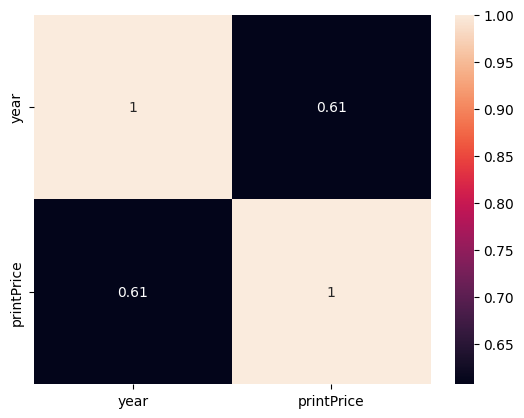

In [ ]:
sns.heatmap(df[["year", "printPrice"]].corr(), annot=True)

# Removendo todos as linhas cujo printPrice seja 0

In [ ]:
df = df[df["printPrice"] != 0]

# Nota-se uma correlação positiva moderada

<Axes: >

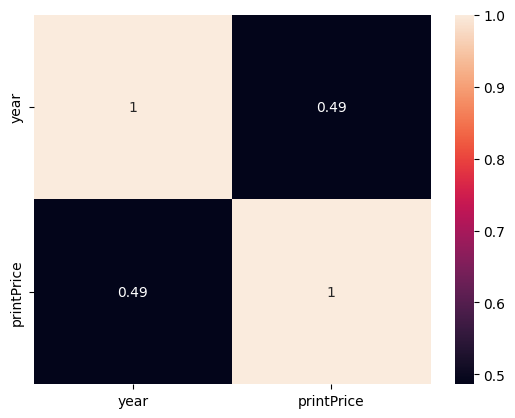

In [ ]:
sns.heatmap(df[["year", "printPrice"]].corr(), annot=True)

In [ ]:
df.head()

,id,title,issueNumber,printPrice,digitalPurchasePrice,year
4,27649,Incredible Hulks (2010) #604 (DJURDJEVIC 70TH ...,604,3.99,NaN,2010
6,60015,The Amazing Spider-Man (2015) #22 (Lozano Teas...,22,3.99,NaN,2015
7,376,Ant-Man (2003) #3,3,2.99,NaN,2003
12,1590,Official Handbook of the Marvel Universe (2004...,9,3.99,NaN,2004
13,25320,Halo Chronicles (2009) #1,1,5.99,NaN,2009


# Colocando o Data Frame em ordem crescente pelo ano

In [ ]:
df = df.sort_values(by="year", ascending=True)

# Gráfico de regressão linear entre year x printPrice

<Axes: xlabel='year', ylabel='printPrice'>

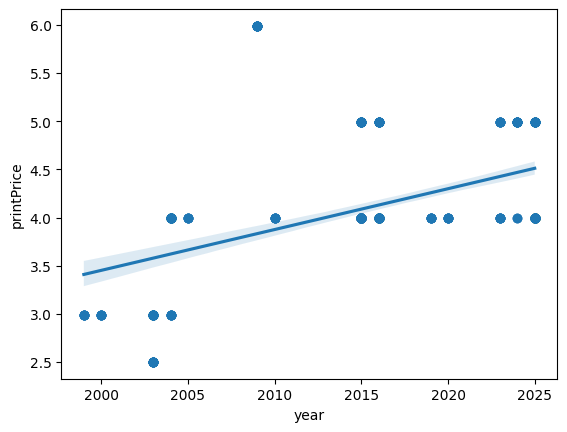

In [ ]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["printPrice"] = pd.to_numeric(df["printPrice"], errors="coerce")

sns.regplot(data=df, x="year", y="printPrice")